# Saliency map for MF974418_1_Crotalus_atrox

- Gradients: Partial derivatives of the output with respect to input features
- Saliencies: Derived importance measures often based on gradients

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import pandas as pd
import os
from tqdm import tqdm

import sys 

sys.path.append('../vespag')

from parse.vep_scores import load_vespag_scores_from_folder

GEMME_ALPHABET = "ACDEFGHIKLMNPQRSTVWY"

## Load VespaG Scores

In [94]:
# load all the vespag scores for the pla2 dataset 
vespag_folder = '/mnt/f/nicole/pla2_vespag'
vespag_scores = load_vespag_scores_from_folder(vespag_folder)   
vespag_scores

Loading VespaG scores:   0%|          | 0/524 [00:00<?, ?file/s]

Loading VespaG scores: 100%|██████████| 524/524 [00:11<00:00, 45.05file/s]


,residue,mutation,vespag,id
0,N1,N1A,-2.552438,AY355170_1_sistruxin_B_Sistrurus_tergeminus
1,N1,N1Y,-3.675682,AY355170_1_sistruxin_B_Sistrurus_tergeminus
2,N1,N1W,-4.004534,AY355170_1_sistruxin_B_Sistrurus_tergeminus
3,N1,N1V,-3.488040,AY355170_1_sistruxin_B_Sistrurus_tergeminus
4,N1,N1T,-2.369666,AY355170_1_sistruxin_B_Sistrurus_tergeminus
...,...,...,...,...
1222094,C122,C122D,-4.730935,EU369742_1_Sistrurus_catenatus
1222095,C122,C122A,-3.605922,EU369742_1_Sistrurus_catenatus
1222096,C122,C122W,-5.072160,EU369742_1_Sistrurus_catenatus
1222097,C122,C122L,-4.458437,EU369742_1_Sistrurus_catenatus


In [95]:
vespag_scores['residue_index'] = vespag_scores.residue.str[1:].astype(int)
vespag_scores['wildtype'] = vespag_scores.residue.str[0]
vespag_scores['mutant'] = vespag_scores.mutation.str[-1]
# standardize the vespag score into [0,1]
vespag_scores['vespag'] = (vespag_scores['vespag'] - vespag_scores['vespag'].min()) / (vespag_scores['vespag'].max() - vespag_scores['vespag'].min())
vespag_scores.head()

,residue,mutation,vespag,id,residue_index,wildtype,mutant
0,N1,N1A,0.635344,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,A
1,N1,N1Y,0.506937,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,Y
2,N1,N1W,0.469344,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,W
3,N1,N1V,0.528388,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,V
4,N1,N1T,0.656238,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,T


In [98]:
from amino_acid_groups import hydropathy_classes, volume_classes, chemical_classes, physicochemical_classes, charge_classes, polarity_classes, hydrogen_donor_acceptor_classes

# annotate the amino acid groups
aa_groups=['hydropathy', 'volume', 'chemical', 'physicochemical', 'hydrogen_donor_acceptor', 'charge', 'polarity']
for aa_group in aa_groups:
    vespag_scores[f'wildtype_{aa_group}'] = vespag_scores.wildtype.map(eval(aa_group + '_classes'))
    vespag_scores[f'mutant_{aa_group}'] = vespag_scores.mutant.map(eval(aa_group + '_classes'))
vespag_scores.head()

,residue,mutation,vespag,id,residue_index,wildtype,mutant,wildtype_hydropathy,mutant_hydropathy,wildtype_volume,...,wildtype_chemical,mutant_chemical,wildtype_physicochemical,mutant_physicochemical,wildtype_hydrogen_donor_acceptor,mutant_hydrogen_donor_acceptor,wildtype_charge,mutant_charge,wildtype_polarity,mutant_polarity
0,N1,N1A,0.635344,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,A,hydrophilic,hydrophobic,small,...,amide,aliphatic,amide,aliphatic,donor and acceptor,none,uncharged,uncharged,polar,nonpolar
1,N1,N1Y,0.506937,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,Y,hydrophilic,neutral,small,...,amide,aromatic,amide,Y,donor and acceptor,donor and acceptor,uncharged,uncharged,polar,polar
2,N1,N1W,0.469344,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,W,hydrophilic,hydrophobic,small,...,amide,aromatic,amide,W,donor and acceptor,donor,uncharged,uncharged,polar,nonpolar
3,N1,N1V,0.528388,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,V,hydrophilic,hydrophobic,small,...,amide,aliphatic,amide,aliphatic,donor and acceptor,none,uncharged,uncharged,polar,nonpolar
4,N1,N1T,0.656238,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,T,hydrophilic,neutral,small,...,amide,hydroxyl,amide,hydroxyl,donor and acceptor,donor and acceptor,uncharged,uncharged,polar,polar


## Load the sequences for annotations

In [99]:
fasta_file = '../data/20231031_PLA2.fasta'

# parse the fasta file
sequences = {}
with open(fasta_file) as f:
    lines = f.readlines()
    for i in range(0, len(lines)):
        sequence = lines[i].strip()
        if sequence[0] == '>':
            id = sequence[1:]
        else:
            sequences[id] = sequence

# show the first two entries of the dictionary
sequences['P00622_caudoxin_Bitis_caudalis']

'NLIQFGNMISAMTGKSSLAYASYGCYCGWGGKGQPKDDTDRCCFVHDCCYGKADKCSPKMILYSYKFHNGNIVCGDKNACKKKVCECDRVAAICFAASKHSYNKNLWRYPSSKCTGTAEKC'

## Load Saliency Maps

Due to data volume, I can't load everything at once. Each of the 524 sequences has a saliency map with the shape of (sequence length x 20 x 2560)... 
But at the moment, I am interested in comparing different types of correlations anyhow for which I can preprocess the saliencies directly (e.g. takking the average of the saliencies per wildtype). 
Hence, I will do these kind of preprocessing diretly after loading... 

### 1) Does the wildtype have an influence on the saliencies?

In [100]:
wildtype_dimension = 0
mutant_dimension = 1
embeddings_dimension = 2

In [101]:
saliency_folder = '/mnt/f/nicole/pla2_saliency'
# load each numpy object in the saliency folder 
saliency_scores = {}
for file in tqdm(os.listdir(saliency_folder), unit='file', desc="Loading saliencies"):
    if file.endswith('.npy'):
        id = file.split('.npy')[0]
        saliency = np.load(os.path.join(saliency_folder, file))
        # reduce the saliency to the average per wiltype 
        saliency = saliency.mean(axis=(mutant_dimension,embeddings_dimension))
        saliency_scores[id] = saliency

Loading saliencies:   0%|          | 2/525 [00:04<17:56,  2.06s/file]


KeyboardInterrupt: 

In [55]:
# parse to a dataframe with these columns: [id, wildtype, saliency]
data = []

# iterate over the saliency_scores dictionary
for protein_id, saliency_values in saliency_scores.items():
    protein_id = protein_id.split('_saliency')[0]
    # get the sequence for the current ID
    sequence = sequences[protein_id]
    for residue_index, (wildtype, saliency) in enumerate(zip(sequence, saliency_values)):
        # extract each residue and its saliency value
        data.append({
            'id': protein_id,
            'residue_index': residue_index + 1,
            'wildtype': wildtype,
            'saliency': saliency
        })

# create a dataframe from the data
saliency_df = pd.DataFrame(data)
# scale the saliency values to [0,1]
saliency_df['saliency'] = (saliency_df['saliency'] - saliency_df['saliency'].min()) / (saliency_df['saliency'].max() - saliency_df['saliency'].min())
saliency_df.head()

,id,residue_index,wildtype,saliency
0,AB072173_1_Protobothrops_flavoviridis,1,H,0.543422
1,AB072173_1_Protobothrops_flavoviridis,2,L,0.616865
2,AB072173_1_Protobothrops_flavoviridis,3,L,0.649538
3,AB072173_1_Protobothrops_flavoviridis,4,Q,0.506821
4,AB072173_1_Protobothrops_flavoviridis,5,F,0.591775


In [56]:
vespag_scores.head()

,residue,mutation,vespag,id,residue_index,wildtype,mutant
0,N1,N1A,0.635344,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,A
1,N1,N1Y,0.506937,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,Y
2,N1,N1W,0.469344,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,W
3,N1,N1V,0.528388,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,V
4,N1,N1T,0.656238,AY355170_1_sistruxin_B_Sistrurus_tergeminus,1,N,T


In [57]:
saliency_df.shape, vespag_scores.shape

((64321, 4), (1222099, 7))

In [58]:
# get the average vespag score per wildtype
vespag_scores_avg = vespag_scores.groupby(['id', 'residue_index', 'wildtype']).vespag.mean().reset_index()
vespag_scores_avg.shape

(64321, 4)

In [60]:
# merge the data together
data = saliency_df.merge(vespag_scores_avg, on=['id', 'residue_index', 'wildtype'], how='inner')
data.shape

(64321, 5)

In [61]:
data.head()

,id,residue_index,wildtype,saliency,vespag
0,AB072173_1_Protobothrops_flavoviridis,1,H,0.543422,0.603327
1,AB072173_1_Protobothrops_flavoviridis,2,L,0.616865,0.446157
2,AB072173_1_Protobothrops_flavoviridis,3,L,0.649538,0.681707
3,AB072173_1_Protobothrops_flavoviridis,4,Q,0.506821,0.545450
4,AB072173_1_Protobothrops_flavoviridis,5,F,0.591775,0.404460


#### Analyze

In [70]:
# Calculate correlation coefficient
correlation = data[['saliency', 'vespag']].corr(method='spearman')

print("Correlation between Saliency and VespaG:")
print(correlation)

Correlation between Saliency and VespaG:
          saliency    vespag
saliency  1.000000 -0.535461
vespag   -0.535461  1.000000


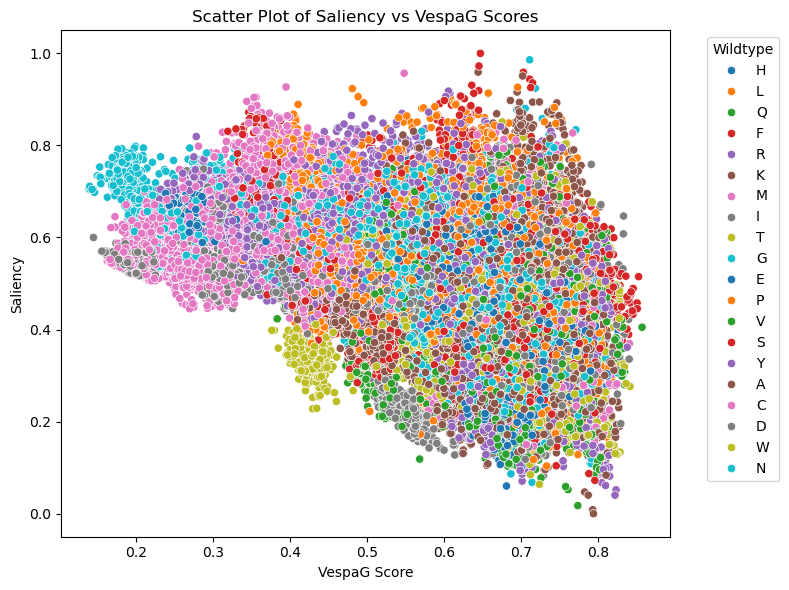

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='vespag', y='saliency', hue='wildtype', palette='tab10', legend='full')
plt.title('Scatter Plot of Saliency vs VespaG Scores')
plt.xlabel('VespaG Score')
plt.ylabel('Saliency')
plt.legend(title="Wildtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


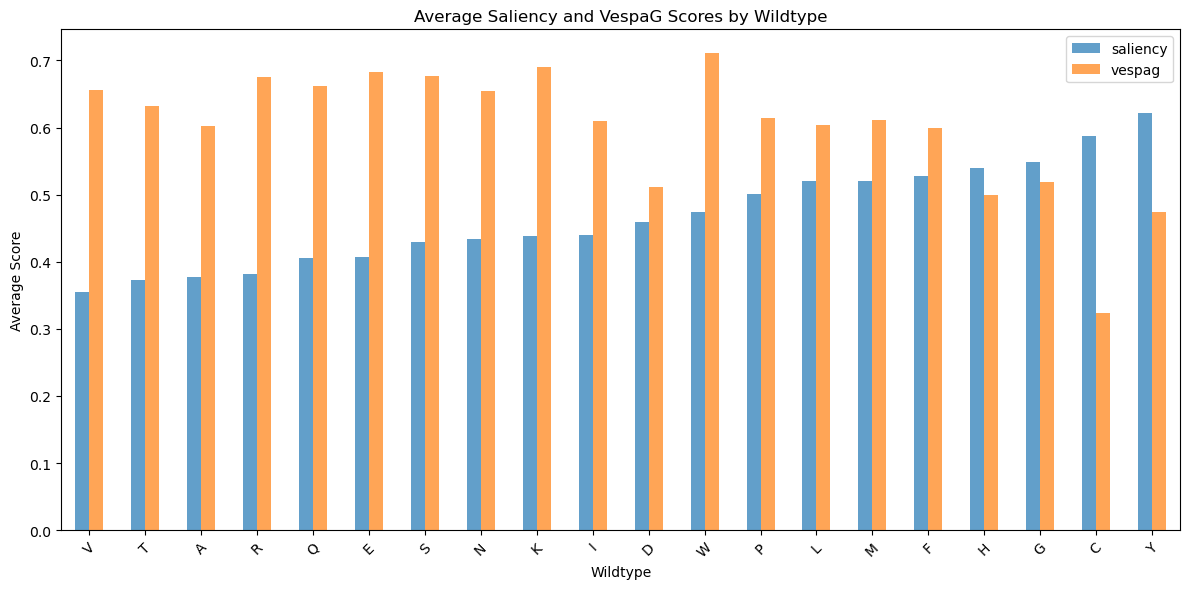

In [65]:
grouped = data.groupby('wildtype')[['saliency', 'vespag']].mean().sort_values('saliency')

# Plot the results
grouped.plot(kind='bar', figsize=(12, 6), alpha=0.7)
plt.title('Average Saliency and VespaG Scores by Wildtype')
plt.ylabel('Average Score')
plt.xlabel('Wildtype')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

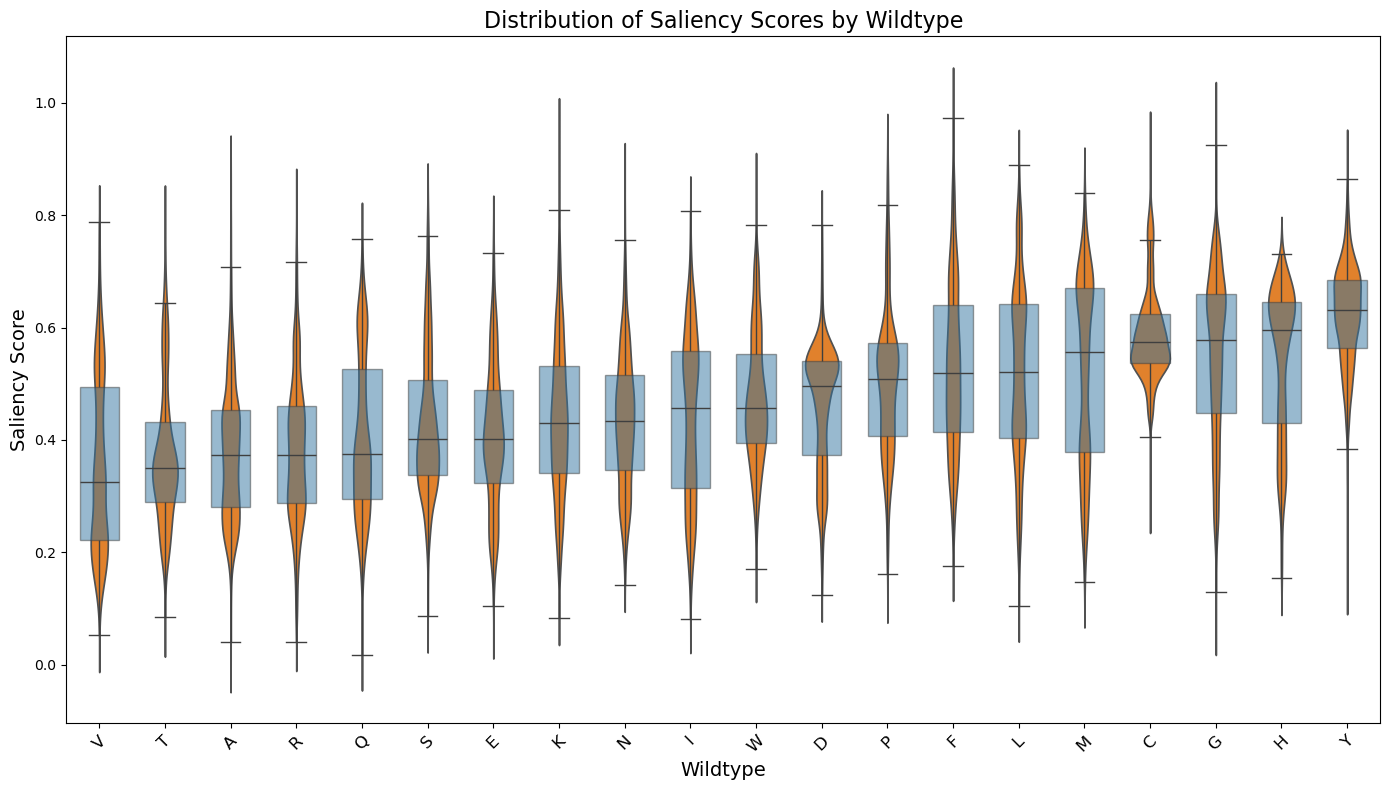

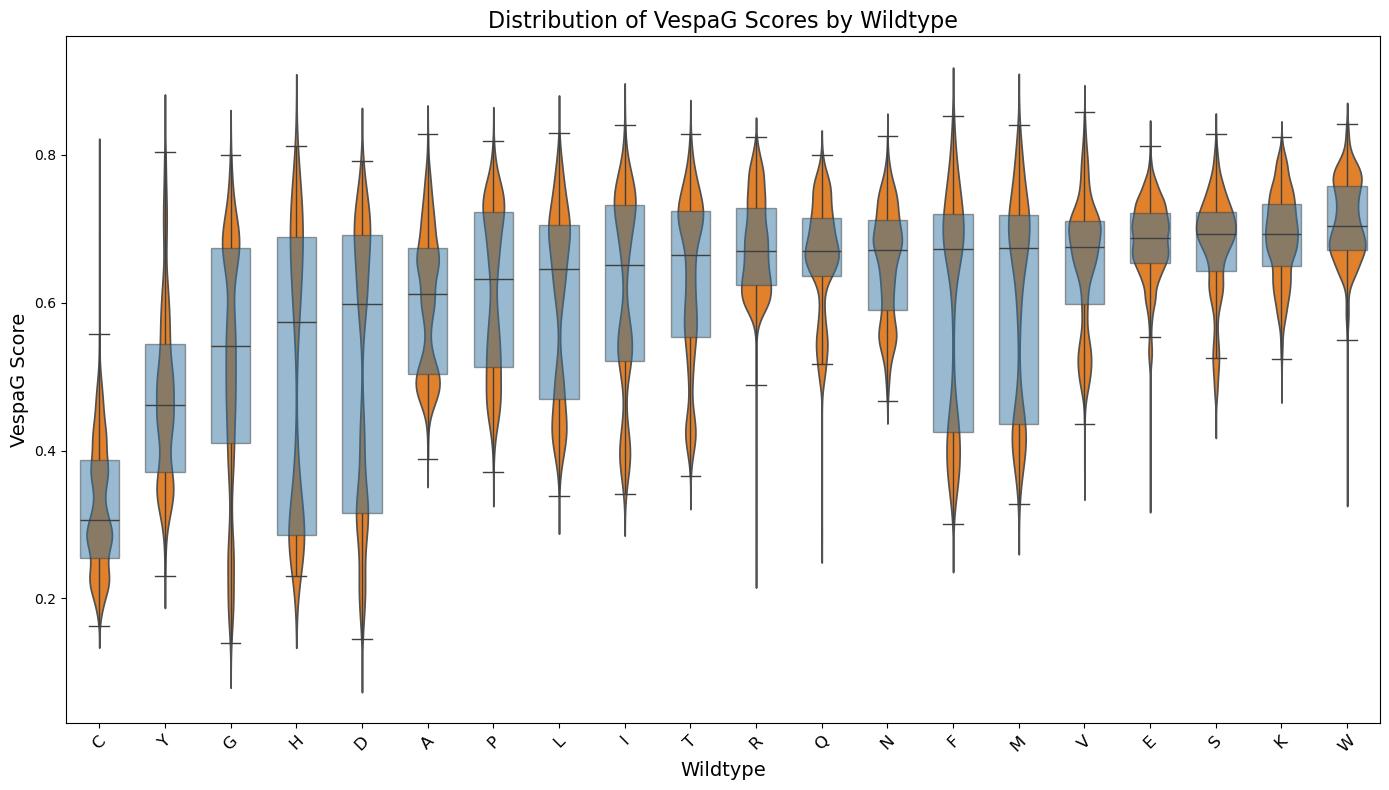

In [78]:
# Boxplot for saliency by wildtype
median_saliency_order = data.groupby('wildtype')['saliency'].median().sort_values().index

plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='wildtype', y='saliency', width=0.6, order=median_saliency_order, showfliers=False, boxprops=dict(alpha=.5))
sns.violinplot(data=data, x='wildtype', y='saliency', width=0.6, order=median_saliency_order, inner=None)

plt.title('Distribution of Saliency Scores by Wildtype', fontsize=16)
plt.ylabel('Saliency Score', fontsize=14)
plt.xlabel('Wildtype', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Repeat for VespaG by wildtype
median_vespag_order = data.groupby('wildtype')['vespag'].median().sort_values().index

plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='wildtype', y='vespag', width=0.6, order=median_vespag_order, showfliers=False, boxprops=dict(alpha=.5))
sns.violinplot(data=data, x='wildtype', y='vespag', width=0.6, order=median_vespag_order, inner=None)

plt.title('Distribution of VespaG Scores by Wildtype', fontsize=16)
plt.ylabel('VespaG Score', fontsize=14)
plt.xlabel('Wildtype', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

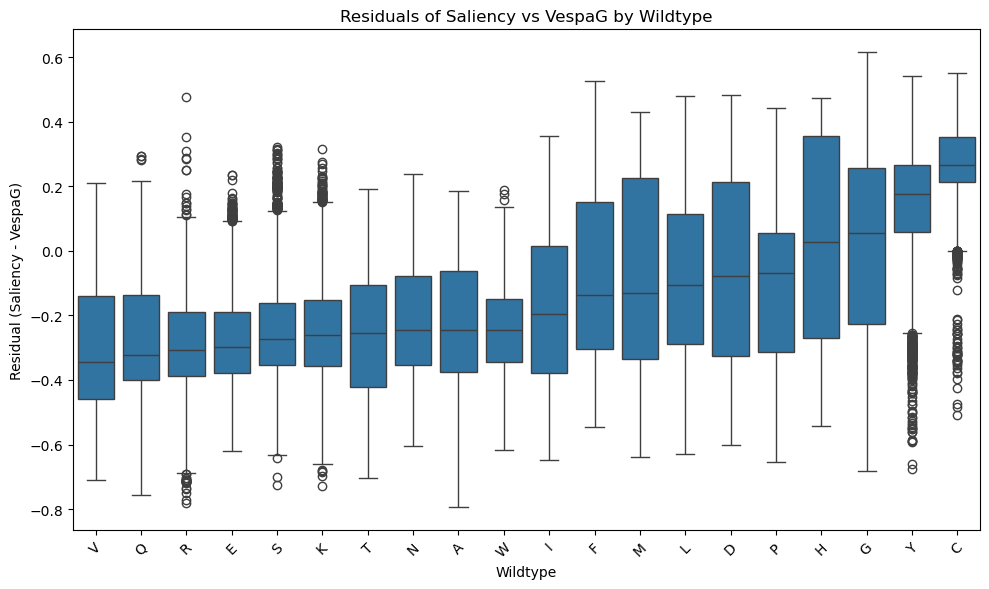

In [79]:
data['residual'] = data['saliency'] - data['vespag']

# Plot residuals
median_residual_order = data.groupby('wildtype')['residual'].median().sort_values().index

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='wildtype', y='residual', order=median_residual_order)
plt.title('Residuals of Saliency vs VespaG by Wildtype')
plt.xlabel('Wildtype')
plt.ylabel('Residual (Saliency - VespaG)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [80]:
# pivot = data.pivot(index='residue_index', columns='wildtype', values='saliency')

# plt.figure(figsize=(12, 8))
# sns.heatmap(pivot, cmap='coolwarm', annot=False)
# plt.title('Heatmap of Saliency by Residue Index and Wildtype')
# plt.xlabel('Wildtype')
# plt.ylabel('Residue Index')
# plt.tight_layout()
# plt.show()


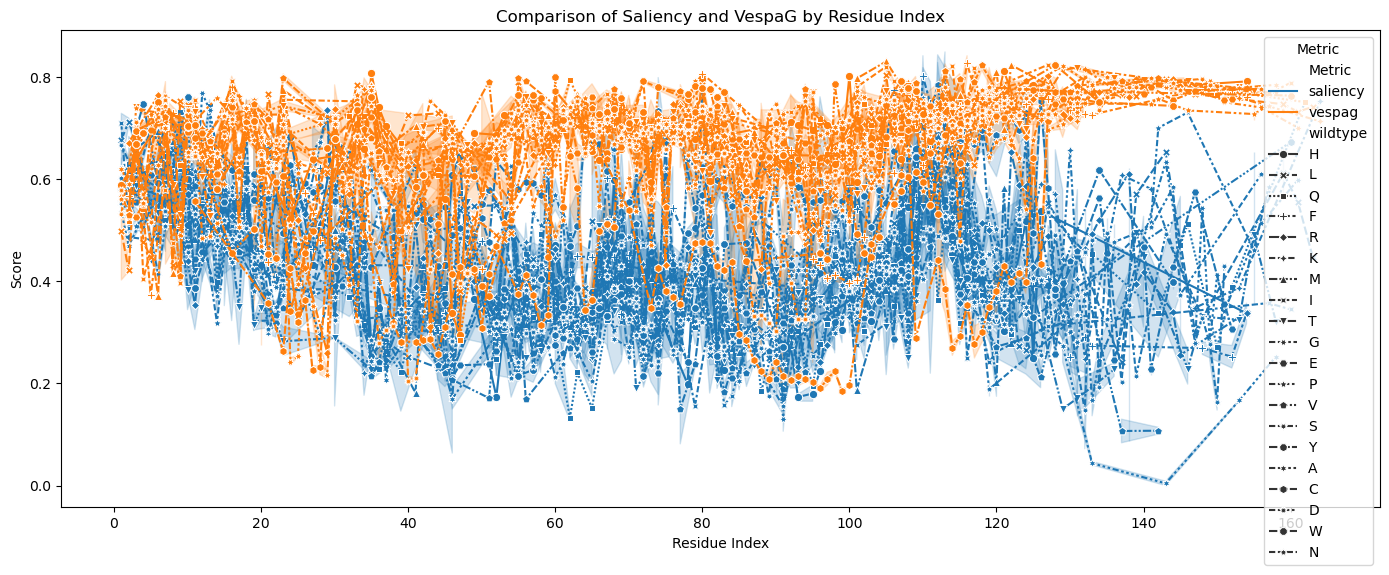

In [68]:
# Paired comparison per residue
plt.figure(figsize=(14, 6))
df_long = data.melt(id_vars=['residue_index', 'wildtype'], value_vars=['saliency', 'vespag'],
                  var_name='Metric', value_name='Score')
sns.lineplot(data=df_long, x='residue_index', y='Score', hue='Metric', style='wildtype', markers=True)
plt.title('Comparison of Saliency and VespaG by Residue Index')
plt.xlabel('Residue Index')
plt.ylabel('Score')
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


### 2) Does the Mutant influence the saliencies?

In [81]:
saliency_folder = '/mnt/f/nicole/pla2_saliency'
# load each numpy object in the saliency folder 
saliency_scores = {}
for file in tqdm(os.listdir(saliency_folder), unit='file', desc="Loading saliencies"):
    if file.endswith('.npy'):
        id = file.split('.npy')[0]
        saliency = np.load(os.path.join(saliency_folder, file))
        # reduce the saliency to the average per wiltype 
        saliency = saliency.mean(axis=(wildtype_dimension,embeddings_dimension))
        saliency_scores[id] = saliency

Loading saliencies: 100%|██████████| 525/525 [11:48<00:00,  1.35s/file]


In [92]:
saliency_scores['AB072173_1_Protobothrops_flavoviridis_saliency'].shape

(20,)

In [82]:
# parse to a dataframe with these columns: [id, mutant, saliency]
data = []

# iterate over the saliency_scores dictionary
for protein_id, saliency_values in saliency_scores.items():
    protein_id = protein_id.split('_saliency')[0]
    # get the sequence for the current ID
    sequence = sequences[protein_id]
    for mutant_index, (mutant, saliency) in enumerate(zip(GEMME_ALPHABET, saliency_values)):
        # extract each residue and its saliency value
        data.append({
            'id': protein_id,
            'mutant_index': mutant_index + 1,
            'mutant': mutant,
            'saliency': saliency
        })

# create a dataframe from the data
saliency_df = pd.DataFrame(data)
# scale the saliency values to [0,1]
saliency_df['saliency'] = (saliency_df['saliency'] - saliency_df['saliency'].min()) / (saliency_df['saliency'].max() - saliency_df['saliency'].min())
saliency_df.head()

,id,residue_index,mutant,saliency
0,AB072173_1_Protobothrops_flavoviridis,1,A,0.303573
1,AB072173_1_Protobothrops_flavoviridis,2,C,0.186079
2,AB072173_1_Protobothrops_flavoviridis,3,D,0.320226
3,AB072173_1_Protobothrops_flavoviridis,4,E,0.431382
4,AB072173_1_Protobothrops_flavoviridis,5,F,0.602962


In [87]:
saliency_df[saliency_df.id == 'AB072173_1_Protobothrops_flavoviridis'].shape

(20, 4)

In [84]:
# get the average vespag score per mutant 
vespag_scores_avg = vespag_scores.groupby(['id', 'residue_index', 'mutant']).vespag.mean().reset_index()
vespag_scores_avg.shape

(1222099, 4)

In [89]:
vespag_scores_avg[vespag_scores_avg.id == 'AB072173_1_Protobothrops_flavoviridis'].shape

(2318, 4)